In [18]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.ticker import MultipleLocator
import os
plt.rcParams['ytick.right']  =plt.rcParams['xtick.top'] =True
xminorLocator=MultipleLocator(2)
#plt.rcParams['set_minor_locator']=xminorLocator
# plt.rcParams.update({
#     "text.usetex": True,
#     "font.family": "sans-serif",
#     "font.sans-serif": ["Time New Rroman"]})
# for Palatino and other serif fonts use:
# plt.rcParams.update({
#     "text.usetex": True,
#     "font.family": "serif",
#     #"font.serif": ["Palatino"],
#     "font.serif": ["Time New Roman"], 
# })
# It's also possible to use the reduced notation by directly setting font.family:
plt.rcParams.update({
  "text.usetex": True,
  "font.family": "Time New Roman",
  "font.size": 8,
})
# font={'family':'serif',
#       'serif':'Time New Roman',
#       'weight':'normal',
#       'size':8}
# plt.rc('font',**font)
def cm_to_inch(value):
    return value/2.54

plt.rcParams['figure.figsize'] = (cm_to_inch(8), cm_to_inch(6.5))
#plt.rcParams['figure.figsize'] =(4,3)#(3.5,2.5)
plt.rcParams['lines.linewidth'] = 1
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
#from mpl_toolkits.mplot3d import Axes3D
#dir="D:\\doc\\data\\ion1testold\\DifferentDelatTimeOfPumpAndProbe\\dteq50fs\\"
#dir="D:\\doc\\data\\ion1testold\\t500t840\\44\\"
#dir='F:\\doc\\ion360\\t_30_60\\'
dir='D:\\dataofpro\\'
#dir='D:\\doc\\data\\TimeFrequencyDistribution\\t2\\'
#dir='D:\\doc\\data\\ion1test\\shift\\5\\'#
print('Working directory',dir)
print("\n")
f=open(dir+"alog.dat",encoding="utf-8")
print(f.read(1500))
levels=100
figureDPI=300
figureType="jpeg"
timeUnit="fs"

Working directory D:\dataofpro\


 Date and time of begin: 2022/ 9/27   9:31:30
 --The calculation starts at  -1.2094450108409813      femtoseconds and ends at   50.100001491606257      femtoseconds
 |----- Quantization parameter -----|
 dt in fs    0.10000
  n_dt=        1001
  Calculated time boundary at           0        -499        1001
  Calculated time boundary at  -50.000000000000000      fs
         nr=       128       nj=        60     trux=        15       nn=       900
       xmin=   1.75000     xmax=  20.00000       dx=   0.14258
 |-----  Molecular parameters  -----|
  Reduced mass        =   1604.3258056640625      a.u.
  Rotation coefficient=   7.5100002288818359      1/cm
 Absorbing boundary   1.0000000000000000      :   19.500000000000000     
 |----- Laser pulse parameters -----|
       E-field(V/m)    Frequency(cm) 1    Frequency(cm) 2    Center_time(ps)           FWHM(ps)         Phase1(pi)         Phase2(pi)
 0.90000000E+10 29265.00000000 23000.00000000     0.00000

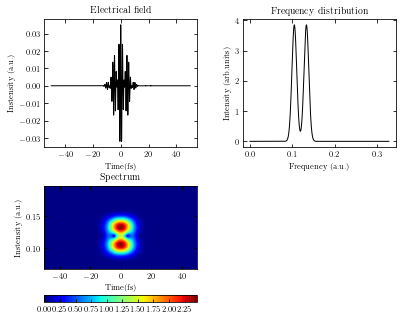

In [96]:
name='TwoColorPhaseIs2020'
plt.figure(figsize=(cm_to_inch(16),cm_to_inch(13)))
plt.subplot(2,2,1)
plt.title("Electrical field")
data=np.loadtxt(dir+"laser.dat")
np.savetxt(dir+"EF"+name+".dat",data)
x1=data[:,0]
y1=data[:,1]
y2=data[:,2]
y3=data[:,3]
#####plt.title("(a)",titleLoc)
plt.plot(x1,y1+y2,'k-')
plt.xlabel("Time(fs)")
plt.ylabel("Instensity (a.u.)")  
#plt.xlim(19,21)

plt.subplot(2,2,2)
plt.title("Frequency  distribution")
data=np.loadtxt(dir+"FreDis1.dat")
np.savetxt(dir+"FD"+name+".dat",data)
x=data[:,0]
y=data[:,1]
plt.plot(x,y,'k-')
plt.xlabel("Frequency (a.u.)")
plt.ylabel("Intensity (arb.units)")
plt.subplot(2,2,3)
plt.title("Spectrum")
data=np.loadtxt(dir+"TimFreDis1.dat")
x=data[:,0]
y=data[:,1]
z=data[:,2]
np.savetxt(dir+"TFD"+name+".dat",data)
plt.tricontourf(x,y,z,levels,cmap='jet')
plt.colorbar(location = 'bottom',pad= 0.2)
plt.xlabel("Time(fs)")
plt.ylabel("Instensity (a.u.)")
plt.subplots_adjust(left=0.125,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.3, 
                    hspace=0.3)
plt.savefig(dir+"LaserTimFreDis1."+figureType,dpi=figureDPI)
os.startfile(dir)

<Figure size 226.772x184.252 with 0 Axes>

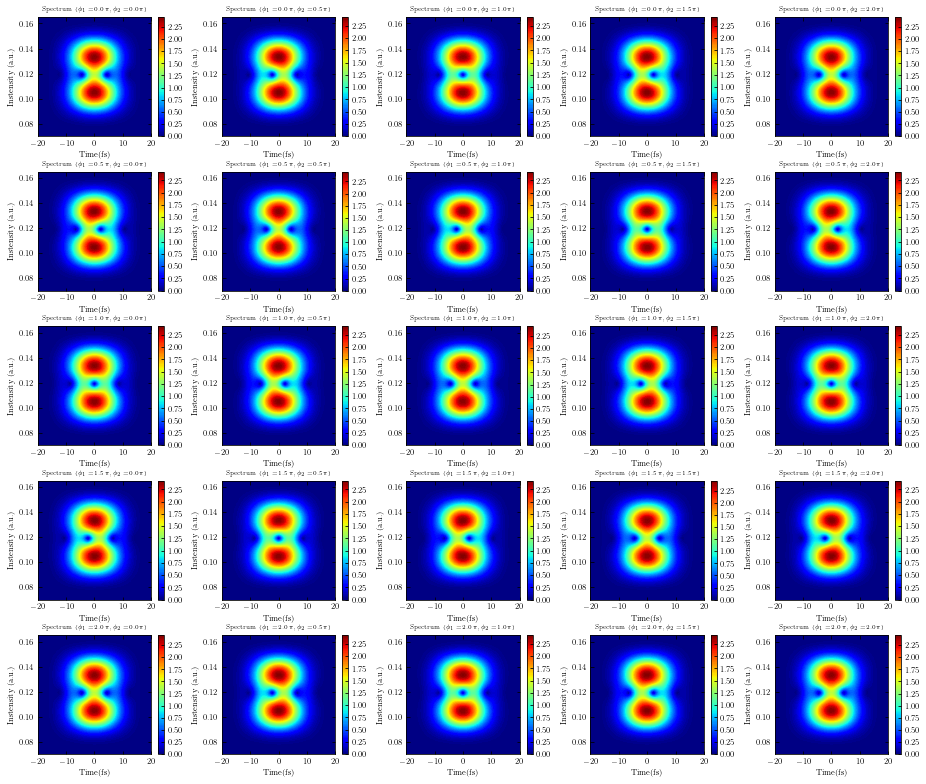

In [98]:
import matplotlib.gridspec as gridspec
fig = plt.figure(tight_layout=True)
plt.figure(figsize=(8*5/2.54,6.5*5/2.54))
gs = gridspec.GridSpec(5, 5)
for i in range(0,5,1):
    for j in range(0,5,1):
        ax=plt.subplot(gs[i,j])
        plt.title("Spectrum ($\\phi_{1}=$"+str(i*0.5) +"$\\,\\pi, \\phi_{2}= $"+str(j*0.5) +
                  "$\\,\\pi$)",fontsize=6)
        if i <= 1 and j <= 1  :
            data=np.loadtxt(dir+"TFDTwoColorPhaseIs0"+str((i)*5)+"0"+str((j)*5)+".dat")
        elif i <= 1 and j > 1 :
            data=np.loadtxt(dir+"TFDTwoColorPhaseIs0"+str((i)*5)+str((j)*5)+".dat")
        elif j <= 1 and i > 1 :
            data=np.loadtxt(dir+"TFDTwoColorPhaseIs"+str((i)*5)+"0"+str((j)*5)+".dat")
        else:
            data=np.loadtxt(dir+"TFDTwoColorPhaseIs"+str((i)*5)+str((j)*5)+".dat")
        x=data[:,0]
        y=data[:,1]
        z=data[:,2]
        plt.tricontourf(x,y,z,levels,cmap='jet')
        plt.xlim(-20,20)
        plt.ylim(0.07,0.165)
        plt.colorbar()
        plt.xlabel("Time(fs)")
        plt.ylabel("Instensity (a.u.)")
plt.subplots_adjust(left=0.125,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.3, 
                    hspace=0.3)
plt.savefig(dir+"LaserTimFreDisto."+figureType,dpi=figureDPI)
os.startfile(dir)
# ax=plt.subplot(gs[0,1])
# plt.title("Spectrum $\\phi_{1}= 0, \\phi_{2}= 0.5 \\pi $")
# data=np.loadtxt(dir+"TFDTwoColorPhaseIs0005.dat")
# x=data[:,0]
# y=data[:,1]
# z=data[:,2]
# plt.tricontourf(x,y,z,levels,cmap='jet')
# plt.colorbar(location = 'bottom',pad= 0.2)
# plt.xlabel("Time(fs)")
# plt.ylabel("Instensity (a.u.)")
# ax=plt.subplot(gs[0,2])
# plt.title("Spectrum $\\phi_{1}= 0, \\phi_{2}= 1.0 \\pi $")
# data=np.loadtxt(dir+"TFDTwoColorPhaseIs0010.dat")
# x=data[:,0]
# y=data[:,1]
# z=data[:,2]
# plt.tricontourf(x,y,z,levels,cmap='jet')
# plt.colorbar(location = 'bottom',pad= 0.2)
# plt.xlabel("Time(fs)")
# plt.ylabel("Instensity (a.u.)")
# ax=plt.subplot(gs[0,3])
# ax=plt.subplot(gs[1,0])
# ax=plt.subplot(gs[1,1])
# ax=plt.subplot(gs[1,2])
# ax=plt.subplot(gs[1,3])
# ax=plt.subplot(gs[2,0])
# ax=plt.subplot(gs[2,1])
# ax=plt.subplot(gs[2,2])
# ax=plt.subplot(gs[2,3])
# ax=plt.subplot(gs[3,0])
# ax=plt.subplot(gs[3,1])
# ax=plt.subplot(gs[3,2])
# ax=plt.subplot(gs[3,3])


Text(0.5, 0, 'Time(fs)')

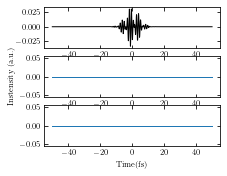

In [16]:
data=np.loadtxt(dir+"laser.dat")
x1=data[:,0]
y1=data[:,1]
y2=data[:,2]
y3=data[:,3]
#####plt.title("(a)",titleLoc)
plt.subplot(3,1,1)
plt.plot(x1,y1,'k-')
plt.subplot(3,1,2)
plt.ylabel("Instensity (a.u.)")  
plt.plot(x1,y2)
plt.subplot(3,1,3)
plt.plot(x1,y3)
plt.xlabel("Time(fs)")

FileNotFoundError: D:\dataofpro\TimFreDis2.dat not found.

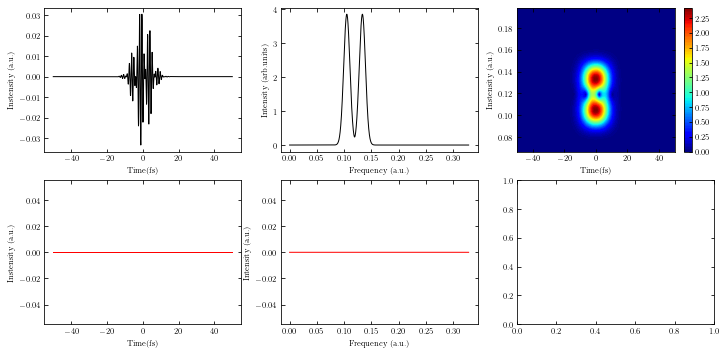

In [17]:
if os.path.exists(dir+'FreDis1.dat'):
    titleLoc="left"
    plt.figure(figsize=(12,9))
    data=np.loadtxt(dir+"laser.dat")
    x1=data[:,0]
    y1=data[:,1]
    y2=data[:,2]
    y3=data[:,3]
    plt.subplot(3,3,1)
    #####plt.title("(a)",titleLoc)
    plt.plot(x1,y1,'k-')
    plt.xlabel("Time(fs)")
    plt.ylabel("Instensity (a.u.)")  
    #plt.xlim(19,21)

    plt.subplot(3,3,2)
    ###plt.title("(b)",titleLoc)
    data=np.loadtxt(dir+"FreDis1.dat")
    x=data[:,0]
    y=data[:,1]
    plt.plot(x,y,'k-')
    plt.xlabel("Frequency (a.u.)")
    plt.ylabel("Intensity (arb.units)")
    plt.subplot(3,3,3)
    ##plt.title("(c)",titleLoc)
    data=np.loadtxt(dir+"TimFreDis1.dat")
    x=data[:,0]
    y=data[:,1]
    z=data[:,2]
    plt.tricontourf(x,y,z,levels,cmap='jet')
    plt.colorbar()
    plt.xlabel("Time(fs)")
    plt.ylabel("Instensity (a.u.)")
    plt.subplot(3,3,4)
    ##plt.title("(d)",titleLoc)
    plt.xlabel("Time(fs)")
    plt.ylabel("Instensity (a.u.)")
    plt.plot(x1,y2,'r-')

    plt.subplot(3,3,5)
    #plt.title("(e)",titleLoc)
    data=np.loadtxt(dir+"FreDis2.dat")
    x=data[:,0]
    y=data[:,1]
    plt.plot(x,y,'r-')
    plt.xlabel("Frequency (a.u.)")
    plt.ylabel("Intensity (a.u.)")
    plt.subplot(3,3,6)
    ##plt.title("(f)",titleLoc)
    data=np.loadtxt(dir+"TimFreDis2.dat")
    x=data[:,0]
    y=data[:,1]
    z=data[:,2]
    plt.tricontourf(x,y,z,levels,cmap='jet')
    plt.xlabel("Time(fs)")
    plt.ylabel("Intensity (arb.units)")
    plt.colorbar()
    plt.subplot(3,3,7)
    ##plt.title("(g)",titleLoc)
    plt.xlabel("Time(fs)")
    plt.ylabel("Instensity (a.u.)")
    plt.plot(x1,y3,'b-')

    plt.subplot(3,3,8)
    ##plt.title("(h)",titleLoc)
    data=np.loadtxt(dir+"FreDis3.dat")
    x=data[:,0]
    y=data[:,1]
    plt.plot(x,y,'b-')
    plt.xlabel("Frequency (a.u.)")
    plt.ylabel("Intensity (arb.units)")
    plt.subplot(3,3,9)
    #plt.title("(i)",titleLoc)
    data=np.loadtxt(dir+"TimFreDis3.dat")
    x=data[:,0]
    y=data[:,1]
    z=data[:,2]
    plt.tricontourf(x,y,z,levels,cmap='jet')
    plt.xlabel("Time(fs)")
    plt.ylabel("Instensity (a.u.)")
    plt.colorbar()
    plt.subplots_adjust(left=0.125,
                        bottom=0.1, 
                        right=0.9, 
                        top=0.9, 
                        wspace=0.3, 
                        hspace=0.3)
    plt.savefig(dir+"LaserTimFreDis."+figureType,dpi=figureDPI)

In [ ]:
data=np.loadtxt(dir+"TimFreDis4.dat")
x=data[:,0]
y=data[:,1]
z=data[:,2]
plt.tricontourf(x,y,z,levels,cmap='jet')
plt.xlabel("Time(fs)")
plt.ylabel("Frequency (a.u.)")
plt.colorbar()
plt.savefig(dir+"TimFreDistTotal."+figureType,dpi=figureDPI)

In [ ]:
data=np.loadtxt(dir+"FreDis4.dat")
x=data[:,0]
y=data[:,1]
plt.plot(x,y,'k-')
plt.xlabel("Frequency (a.u.)")
plt.ylabel("Intensity (arb.units)")
plt.savefig(dir+"FreDistTotal."+figureType,dpi=figureDPI)

In [ ]:
legengLoc=(0.15,0.75)
plt.figure(figsize=((16/2.54),(13/2)))
#plt.figure(figsize=(8,6))
titleLoc="left"
plt.subplot(2,2,1)
plt.title("(a)",loc=titleLoc)
data=np.loadtxt(dir+"TimFreDis4.dat")
x=data[:,0]
y=data[:,1]
z=data[:,2]
plt.xlabel("Time (fs)")
plt.ylabel("Frequency (a.u.)")
plt.tricontourf(x,y,z,100,cmap='jet')
#plt.colorbar()
plt.subplot(2,2,2)
plt.title("(b)",loc=titleLoc)
data1=np.loadtxt(dir+"FreDis1.dat")
data2=np.loadtxt(dir+"FreDis2.dat")
data3=np.loadtxt(dir+"FreDis3.dat")
data4=np.loadtxt(dir+"FreDis4.dat")
x1=data1[:,0]
y1=data1[:,1]
x2=data2[:,0]
y2=data2[:,1]
x3=data3[:,0]
y3=data3[:,1]
x4=data4[:,0]
y4=data4[:,1]
plt.xlabel("Intensity (arb.units)") 
plt.ylabel("Frequency (a.u.)")
#plt.xlim(0,5)
plt.ylim(min(np.loadtxt(dir+"TimFreDis4.dat")[:,1]),max(np.loadtxt(dir+"TimFreDis4.dat")[:,1]))
# plt.plot(y4,x4)
plt.plot(y1,x1,"k-",y2,x2,"r--")#,y3,x3,'b-.')
#plt.legend(["pump1","pump2","probe"],loc=(0.55,0.7))
plt.legend(["pump","probe"],loc=(0.6,0.1))
#plt.legend(["P 1","P 2","P 3"],loc=legengLoc)
plt.subplot(2,2,3)
data=np.loadtxt(dir+"Laser.dat")
x=data[:,0]
y1=data[:,4]
y2=data[:,5]
y3=data[:,6]
plt.xlim(min(x),max(x))
plt.title("(c)",loc=titleLoc)
plt.plot(x,y1,'k-',x,y2,'r--',x,-y1,'k-',x,-y2,'r--',x,y3,'b-.',x,-y3,'b-.')
plt.xlabel("Time (fs)")
plt.ylabel("Intensity (a.u.)")
# plt.legend(["pump1","pump2","probe"],loc=legengLoc)
plt.legend(["pump","probe"],loc=legengLoc)
#plt.legend(["P 1","P 2","P 3"],loc=legengLoc)
plt.subplot(2,2,4)
plt.title("(d)",loc=titleLoc)
data=np.loadtxt(dir+"Laser.dat")
x1=data[:,0]
y1=data[:,1]
y2=data[:,2]
y3=data[:,3]
plt.xlim(min(x),max(x))
plt.xlabel("Time (fs)")
plt.ylabel("Intensity (a.u.)")

plt.plot(x1,y1,'k-',x1,y2,'r-',x,y3,'b-',)
# plt.legend(["pump1","pump2",'probe'],loc=legengLoc)
plt.legend(["pump","probe"],loc=legengLoc)
#plt.legend(["P 1","P 2","P 3"],loc=legengLoc)
plt.subplots_adjust(left=0.125,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.3, 
                    hspace=0.22)
plt.savefig(dir+"TimeFrequencyDistribution."+figureType,bbox_inches = 'tight',dpi=figureDPI)